# Big Data - Text Mining example
### Yelp review classification

1.	Import the necessary libraries 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pylab as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
import numpy as np

In [95]:
data = 'yelp-data.csv'
df = pd.read_csv(data, parse_dates=['date'], encoding="UTF-8")

print(df.head(),'\n')
print(df.shape, '\n')
print(df.dtypes)

   user_id  prod_id rating  label       date  \
0    60609     3611    bad      1 2013-07-12   
1   121342     3528    bad      1 2012-07-07   
2   102327     1378    bad     -1 2012-11-17   
3   108938     4037    bad      1 2013-01-28   
4    66638     2645    bad     -1 2013-12-03   

                                              review  Year           venue  
0  horrible. I went there for a nice fresh lobste...  2013     Don Pepe II  
1  This might be ok for a beer, but don't dare tr...  2012  Rattle ‘N’ Hum  
2  one of the worst place to eat. We have never a...  2012    Green Chilli  
3  alfies has ok food. The manager is super nice ...  2013         Alfie’s  
4  Love love this place! The food is great! The r...  2013   Buon Appetito   

(200, 8) 

user_id             int64
prod_id             int64
rating             object
label               int64
date       datetime64[ns]
review             object
Year                int64
venue              object
dtype: object


In [17]:
df.columns

Index(['user_id', 'prod_id', 'rating', 'label', 'date', 'review', 'Year',
       'venue'],
      dtype='object')

In [18]:
df[['rating', 'label','review','venue']]

,rating,label,review,venue
0,bad,1,horrible. I went there for a nice fresh lobste...,Don Pepe II
1,bad,1,"This might be ok for a beer, but don't dare tr...",Rattle ‘N’ Hum
2,bad,-1,one of the worst place to eat. We have never a...,Green Chilli
3,bad,1,alfies has ok food. The manager is super nice ...,Alfie’s
4,bad,-1,Love love this place! The food is great! The r...,Buon Appetito
...,...,...,...,...
195,bad,1,"This was my first, and last, visit to Sketch B...",Sketch
196,bad,-1,Nice local bar but the staff is horrible! The...,Grasshopper Too
197,bad,1,Oy. I am writing in response to brunch only --...,Adelina’s
198,bad,1,This place has dumbed it self way down from th...,Zaroka Bar And Restaurant


In [19]:
df['rating'].value_counts()

bad     119
good     81
Name: rating, dtype: int64

In [20]:
df['target_rating'] = np.where(df['rating']== 'good', 1, 0)

In [21]:
df['target_rating'].value_counts()

0    119
1     81
Name: target_rating, dtype: int64

2. Distribution of ratings

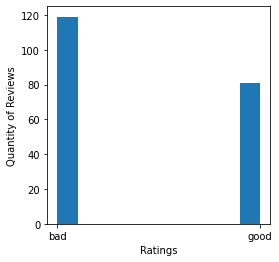

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

ax.hist(df["rating"])
ax.set_xlabel("Ratings")
ax.set_ylabel("Quantity of Reviews")

plt.show()

3.	Process the Review text and create and build a TF-IDF and bigrams (n-grams = 2) set and the original attributes. 

In [23]:
# Create a series to store the labels: y
y = df['target_rating']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], y, test_size = 0.2, random_state = 1)

In [24]:
df['review'][:1].values

array(['horrible. I went there for a nice fresh lobster dinner, but instead went with the \xa0 soft shell crab done w garlic oil, the entire 3 crabs were \xa0completely soaked in some ? sauce that was very watered down and old fishy tasting. then the \xa0rice piao was \xa0old \xa0clumps of \xa0rice with old fishy \xa0seafood and very dry lobster then the \xa0"fish soup" \xa05 dollars \xa0was a horror, some thickened \xa0corn starch with extremely \xa0old fish taste no identifiable \xa0fish in it. the \xa0Spanish \xa0antipasto was some sliced up \xa0pieces \xa0of goat cheese, salami and overly soaked asparagus and pepper. I will never go back there 90.00 for 2 and I am sick to my stomach'],
      dtype=object)

In [25]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

## Building a text classifier

In [29]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Create the probabity tags: y_prob  (shape: NX2)
y_prob = nb_classifier.predict_proba(tfidf_test)

importances = list(zip(nb_classifier.coef_[0], tfidf_vectorizer.get_feature_names()))

C:\ProgramData\Anaconda3\envs\ds\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [62]:
# Identify the 10 most important Attributes

importance_df = pd.DataFrame(importances, index=[x for (_,x) in importances]).sort_values(by = 0, ascending = False).reset_index()

print("The 10 most important attributes according to the COUNT Method are:")
print(importance_df.iloc[0:10,0])

The 10 most important attributes according to the COUNT Method are:
0        great
1         food
2    delicious
3      chicken
4         best
5        place
6         good
7        pizza
8      amazing
9      service
Name: index, dtype: object


# Testing the classifier

In [77]:
text = ["the food is great! Awesome place!"]
pd_text = pd.Series(text)
tfidf_text = tfidf_vectorizer.transform(pd_text)
prediction = nb_classifier.predict(tfidf_text)

In [81]:
print('the review was classified as: ', prediction[0])

the review was classified as:  1


In [82]:
text = ["the food is horrible! Never again!!!!"]
pd_text = pd.Series(text)
tfidf_text = tfidf_vectorizer.transform(pd_text)
prediction = nb_classifier.predict(tfidf_text)

In [83]:
print('the review was classified as: ', prediction[0])

the review was classified as:  0
